# SF2935 Project

This is a low-data event, namely we are gven 500 training samples. The dataset comprises of songs, and each row is sample song, which is represented by a an 11-D Vector which account for 11 features - !!!TODO Write them here

In [2]:
import numpy as np 

import matplotlib.pyplot as plt

import scipy.linalg as la

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

import torch
from torch.utils.data import Dataset, DataLoader

seed = 42

## TODO

- __Pre-processing__
    - [ ] Relevance determination of features
    - [ ] Visualize dataset
    - [ ] Split into training and test sets
    
- __Models__
    - [ ] Logistic regression
    - [ ] Discriminant analysis (LDA, QDA)
    - [ ] k-Nearest neighbours
    - [ ] Support vector machines
    - [ ] Tree based methods 
    - [ ] Neural networks

- __Model validation and tuning__
    - [ ] k-Cross validation
    - [ ] Confusion matrix analysis
    - [ ] Bayesian optimization of hyper-parameters
    - [ ] Relevance determination

- __Extras__
    - [ ] Used GAN to generate data to improve neural network classification

In [5]:
dataset  = np.genfromtxt('project_train.csv', delimiter=',')
dataset

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [  0.545,   0.884,   5.   , ...,   0.641,  86.049,   1.   ],
       [  0.795,   0.545,   7.   , ...,   0.809,  91.967,   1.   ],
       ...,
       [  0.627,   0.583,   5.   , ...,   0.299, 129.674,   0.   ],
       [  0.446,   0.468,  11.   , ...,   0.223, 169.983,   0.   ],
       [  0.693,   0.666,  10.   , ...,   0.651,  92.015,   0.   ]])

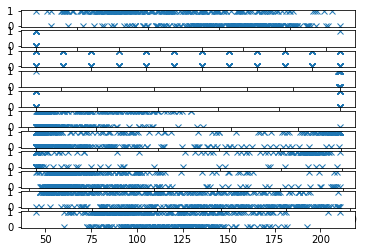

In [3]:
dataset  = np.genfromtxt('project_train.csv', delimiter=',')
dataset  = dataset[~np.isnan(dataset).any(axis=1)]

features = ['danceability', 'energy','key','loudness','mode','speechniess','acousticness','instrumentalness','liveness','valence','tempo']

x = dataset[:,0:-1]
y = dataset[:,-1]

test_set_final = np.genfromtxt('project_test.csv', delimiter=',')
test_set_final  = test_set_final[~np.isnan(test_set_final).any(axis=1)]


#print(x_test_set_final.shape)

fig, axs = plt.subplots(len(features))
for i in range(len(features)):
    axs[i].plot(x[:,i],y,'x')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi']     = 100 

#No. datapoints from each class.
nClass0 = sum(y==0)
nClass1 = sum(y==1)

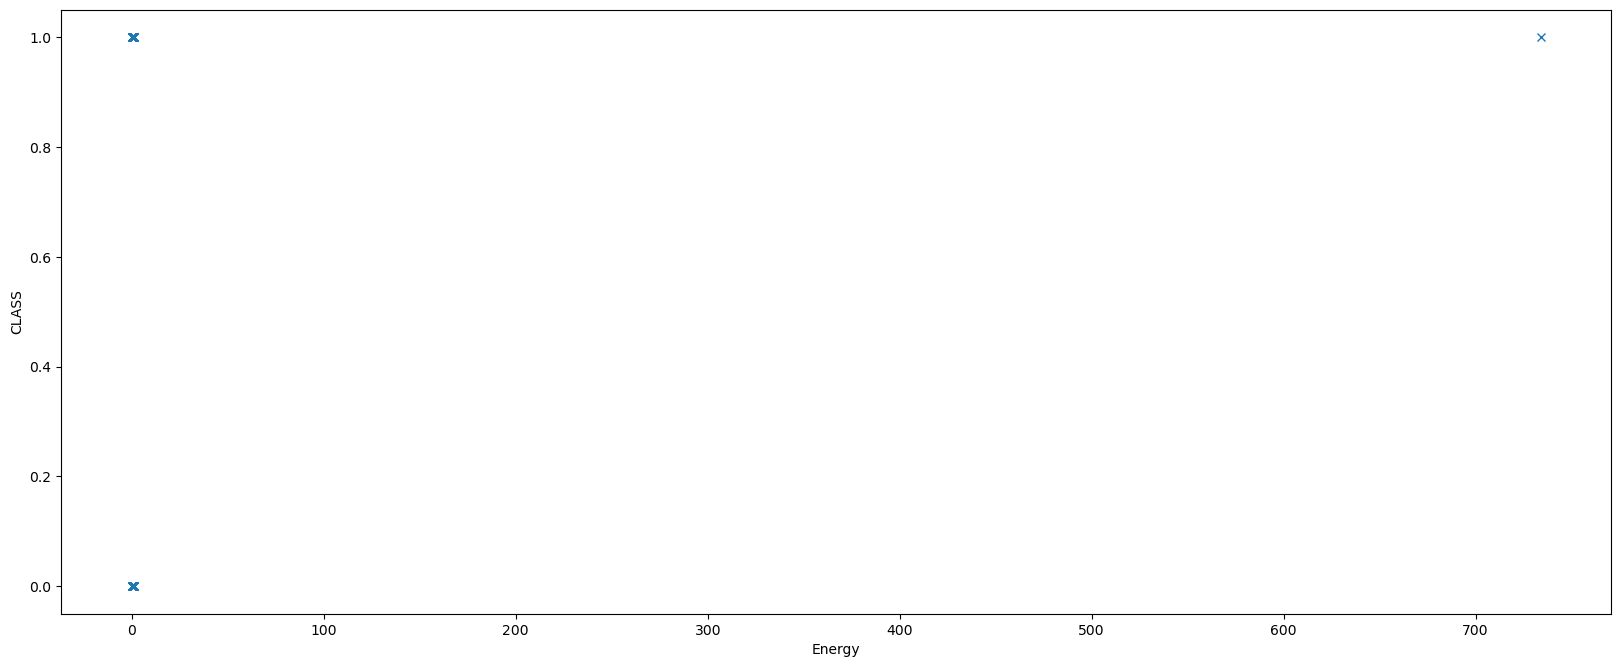

In [61]:
plt.plot(x[:,1],y,'x')
plt.xlabel('Energy')
plt.ylabel('CLASS')
plt.show()

In [4]:
dataset.shape

(483, 12)

In [5]:
# Scaling the input features, then splitting into training and testing dataset
scaler   = StandardScaler()
scaler.fit(x)
dataset  = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

## Logistic regression

In [6]:
# Todo, tuning, regularization, plot coefficients £

logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8099173553719008


## Linear Discriminant Analysis (Anton)

In [7]:
#Assumes that the proportion of probabilites is 0.5.

lda = LinearDiscriminantAnalysis() #Creates LDA instance.
lda.fit(x_train,y_train) #Training.
lda_predictions = lda.predict(x_test) #The predictions for the test set.
print('Accuracy of LDA is: ',metrics.accuracy_score(y_test,lda_predictions))

Accuracy of LDA is:  0.8181818181818182


## Quadratic Discriminant Analysis (Nazaal)

In [8]:
#Assumes that the proportion of probabilites is 0.5.

qda = QuadraticDiscriminantAnalysis() #Creates QDA instance.
qda.fit(x_train,y_train) #Training.
qda_predictions = qda.predict(x_test) #The predictions for the test set.
print('Accuracy of QDA is: ',metrics.accuracy_score(y_test,qda_predictions))

Accuracy of QDA is:  0.6942148760330579


## k-Nearest neighbours (Viktor)

In [53]:
len(x_train)
max(x_train[:,1])
x_train[:,1]
np.reshape(x_train[:,1],(1,len(x_train[:,1]))).T
len(np.reshape(x_train[:,1],(1,len(x_train[:,1]))).T)
len(y_train)

362

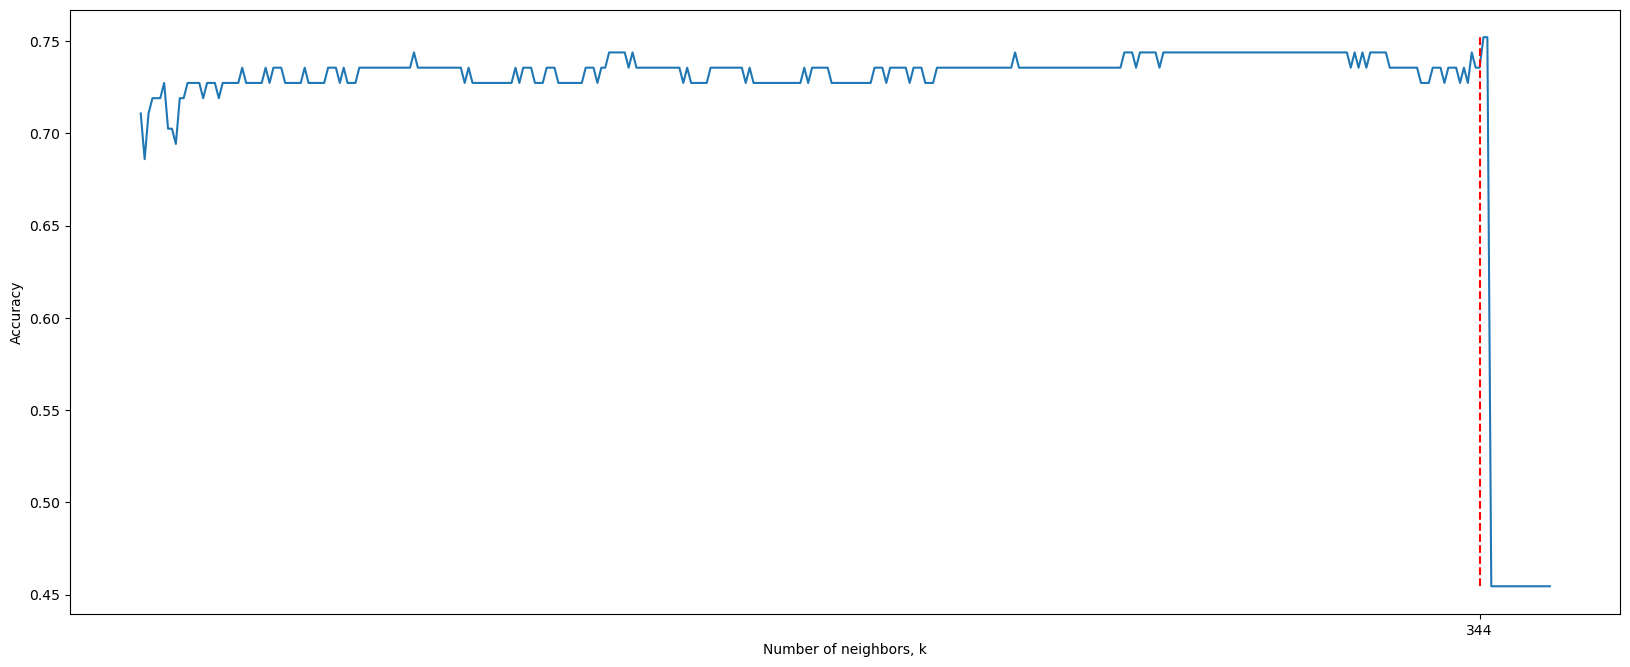

In [57]:
acc_list = []
for k in range(1,len(x_train)+1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(np.reshape(x_train[:,0],(1,len(x_train[:,0]))).T, y_train) #neigh.fit(np.reshape(x_train, y_train)
    y_pred = neigh.predict(np.reshape(x_test[:,0],(1,len(x_test[:,0]))).T) #neigh.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
max_acc = max(acc_list)
opt_k = acc_list.index(max_acc)
plt.plot(range(1,len(x_train)+1),acc_list,[opt_k,opt_k],[min(acc_list),max_acc],'r--')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
locs, labels = plt.xticks()
plt.xticks([opt_k])
plt.show()

In [12]:
labels

<a list of 10 Text major ticklabel objects>

In [13]:
k = 35
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7355371900826446


## Support Vector Machines (Viktor)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
parameters = {'kernel':('linear','rbf'), 'C':[1,100]}
clf1 = GridSearchCV(svc, parameters)
clf1.fit(x, y)
#clf1 = svm.SVC(kernel='linear', C=1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf')})

In [ ]:
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.svm import SVC
#C_range = np.logspace(-2, 10, 13)
#gamma_range = np.logspace(-9, 3, 13)
#param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
#grid.fit(x, y)

#print("The best parameters are %s with a score of %0.2f"
#      % (grid.best_params_, grid.best_score_))

In [34]:
#clf1.best_estimator_
#clf1.cv_results_.keys()
clf1 = svm.SVC(kernel='linear', C=100)
k = 5
scores = cross_val_score(clf1, x, y, cv=k)
clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean accuracy using  5 -fold CV: 0.73 (+/- 0.22)


In [31]:
#clf1.best_estimator_
#clf1.cv_results_.keys()
clf2 = svm.SVC(kernel='sigmoid', C=100, coef0=1.8)
k = 5
scores = cross_val_score(clf2, x, y, cv=k)
clf2.fit(x_train,y_train)
y_pred = clf2.predict(x_test)
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean accuracy using  5 -fold CV: 0.70 (+/- 0.33)


In [58]:
x_new = np.reshape(x[:,3],(1,len(x[:,3]))).T
x_newtrain = np.reshape(x_train[:,3],(1,len(x_train[:,3]))).T
x_newtest = np.reshape(x_test[:,3],(1,len(x_test[:,3]))).T
clf_new = svm.SVC(kernel='linear', C=1)
k = 5
scores = cross_val_score(clf_new, x_new, y, cv=k)
clf_new.fit(x_newtrain,y_train)
y_pred = clf_new.predict(x_newtest)
y_pred1 = clf_new.predict(x_new)
print('Accuracy of single test: ',metrics.accuracy_score(y_test, y_pred)) 
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of single test:  0.6859504132231405
Mean accuracy using  5 -fold CV: 0.70 (+/- 0.35)


In [59]:
x_new

array([[-4.8070e+00],
       [-8.1530e+00],
       [-5.8250e+00],
       [-1.8030e+00],
       [-2.8320e+00],
       [-4.0990e+00],
       [-5.8780e+00],
       [-6.7740e+00],
       [-2.5097e+01],
       [-3.4120e+00],
       [-1.5523e+01],
       [-4.7560e+00],
       [-7.6510e+00],
       [-4.7050e+00],
       [-3.0680e+00],
       [-7.3620e+00],
       [-3.2050e+00],
       [-4.8770e+00],
       [-3.6030e+00],
       [-5.6820e+00],
       [-3.4200e+00],
       [-6.9400e+00],
       [-8.2640e+00],
       [-6.1770e+00],
       [-4.1370e+00],
       [-1.3496e+01],
       [-3.4420e+00],
       [-2.7880e+00],
       [-3.6250e+00],
       [-4.9380e+00],
       [-4.6690e+00],
       [-5.1990e+00],
       [-4.7270e+00],
       [-1.3904e+01],
       [-6.6570e+00],
       [-7.5640e+00],
       [-6.6250e+00],
       [-3.6690e+00],
       [-8.9990e+00],
       [-5.0020e+00],
       [-5.3270e+00],
       [-3.3260e+00],
       [-4.6010e+00],
       [ 4.3310e+00],
       [-6.1520e+00],
       [-3

In [12]:
from sklearn.metrics import confusion_matrix

In [14]:
clf = svm.SVC(kernel='linear', C=1)
k = 5
scores = cross_val_score(clf, x, y, cv=k)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x)
print('Accuracy of single test: ',metrics.accuracy_score(y_test, y_pred)) 
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
confusion_matrix(y,y_pred1)

Accuracy of single test:  0.8016528925619835
Mean accuracy using  5 -fold CV: 0.70 (+/- 0.26)


array([[209,  32],
       [ 62, 180]], dtype=int64)

## Tree based methods (Anton)

"\n#The Below parameter gives different results for different sample sizes.\n#Parameter testing: Maximum number of regions/leaves allowed.\nacc_list_max_leaf_nodes = []\nm = 5 #Min Max number of regions/leaves allowed.\nn = 30 #Max Max number of regions/leaves allowed.\nfor i in range(m,n):\n    clt.set_params(max_leaf_nodes=i)\n    clt = clt.fit(x_train, y_train)\n    y_pred = clt.predict(x_test)\n    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))\nplt.plot(range(m,n),acc_list_max_leaf_nodes)\n#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))\n#print(argmax(acc_list_max_leaf_nodes))\n#Gets parameters.\n"

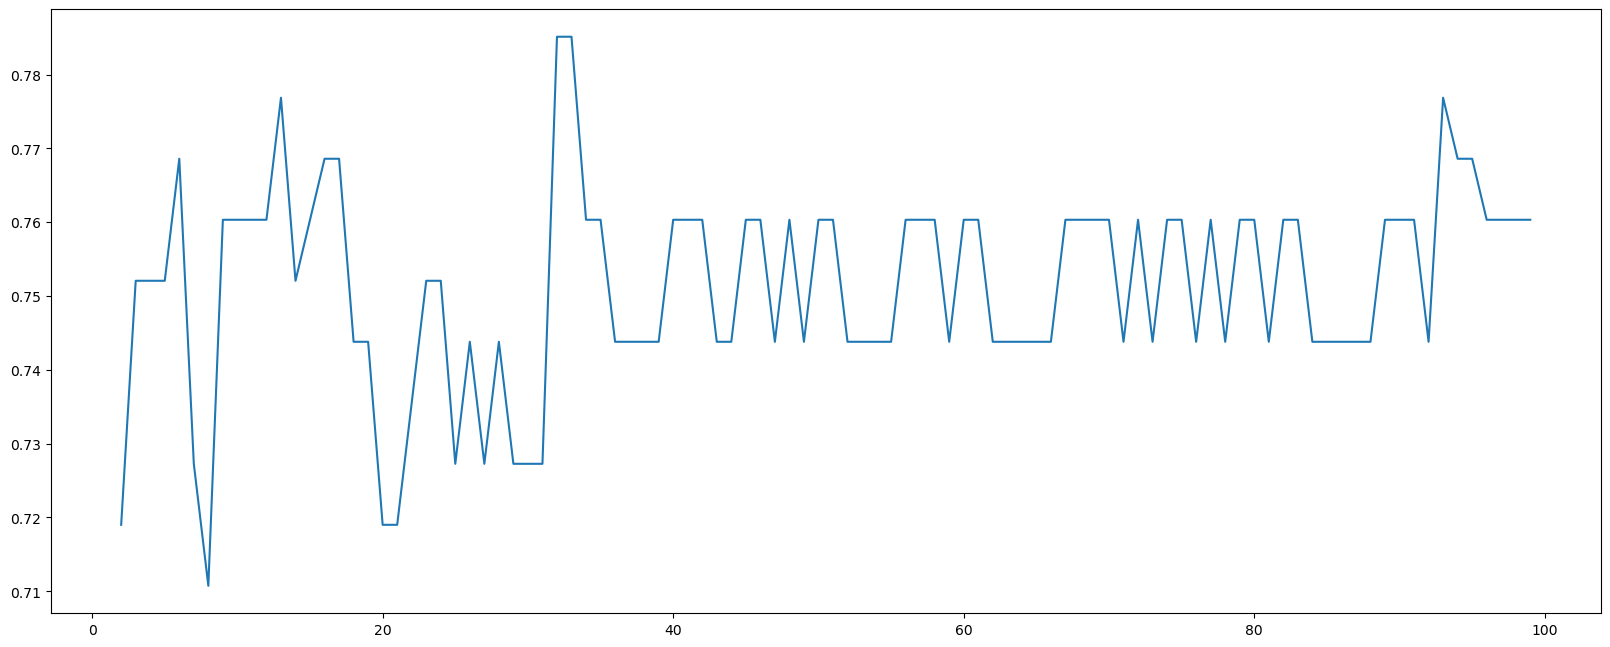

In [138]:
"""
clt = tree.DecisionTreeClassifier()
clt.fit(x_train, y_train)
y_pred = clt.predict(x_test)
print("The accuracy is: ", metrics.accuracy_score(y_test,y_pred))
"""


#The below parameter is "sample size independent".
#Parameter testing: Minimum datapoints required to split a region/node.
acc_list_min_samples_split = []
n = 100 #Minimum sample size needed to split.
for i in range(2,n):
    clt.set_params(min_samples_split=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_min_samples_split.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(2,n),acc_list_min_samples_split)


"""
#The Below parameter gives different results for different sample sizes.
#Parameter testing: Maximum number of regions/leaves allowed.
acc_list_max_leaf_nodes = []
m = 5 #Min Max number of regions/leaves allowed.
n = 30 #Max Max number of regions/leaves allowed.
for i in range(m,n):
    clt.set_params(max_leaf_nodes=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(m,n),acc_list_max_leaf_nodes)
#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
#print(argmax(acc_list_max_leaf_nodes))
#Gets parameters.
"""

#print("The parameters are: ",clt.get_params())
#print("The number of leaves is: ",clt.get_n_leaves())


#Plots the tree.
#tree.plot_tree(clt)

## Neural networks (Nazaal)

In [12]:
# Load train and test input and output into Pytorch dataloaders
training_dataset_loader = torch.utils.data.DataLoader(dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)



In [ ]:
# Design atleast 2 architectures
class FCNN()

class CNN()

# Check atleast 2 loss functions


# Look into hyperparameter optimization

## Gaussian processes (Nazaal)

In [6]:
var_x = np.std(x, axis=0)
var_y = np.std(y)
kernels = [var_y * RBF(var_x),
           var_y * RationalQuadratic(length_scale=1.0, alpha=0.1),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           var_y * Matern(length_scale=var_x,
                        nu=1.0)]

gp_test_errors = []
for kernel in kernels:
    gpc = GaussianProcessClassifier(kernel=kernel)
    gpc.fit(x_train, y_train)
    gp_test_errors.append(gpc.score(x_test, y_test))
print("Test error are")
gp_test_errors


Test error are


[0.8347107438016529,
 0.7355371900826446,
 0.7768595041322314,
 0.8429752066115702]

In [ ]:
# Hyperparameter optimization
def HyperParameterOpt(model):
    # Trains the model over different hyper-parameter settings and finds the best one
    pass

In [ ]:
# Note: Use ensemble methods for final classifier